In [2]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
reg_path = "all_registration.csv"
reg_header = ["day", "date", "time", "user_id", "action", "born", "phone", "country", "acquired_from"]
registration = pd.read_csv(reg_path, delimiter=';', names = reg_header)
registration["date"] = pd.to_datetime(registration["date"])

free_path = "all_free_tree.csv"
free_tree = pd.read_csv(free_path, delimiter=';', names =["day", "date", "user_id", "action"])
free_tree["date"] = pd.to_datetime(free_tree["date"])

super_path = "all_super_tree.csv"
super_tree = pd.read_csv(super_path, delimiter=';', names =["day", "date", "user_id", "action"])
super_tree["date"] = pd.to_datetime(super_tree["date"])

In [4]:
super_sent_by_user = super_tree.groupby("user_id").count()[["action"]].rename(columns={"action": "super_sent"})
paid_super_sent_users = super_sent_by_user[super_sent_by_user["super_sent"] > 1].reset_index()

reg_users = len(registration)
free_sent_users = len(free_tree.groupby("user_id").count())
free_super_users = len(super_tree.groupby("user_id").count())
paid_users = len(paid_super_sent_users)

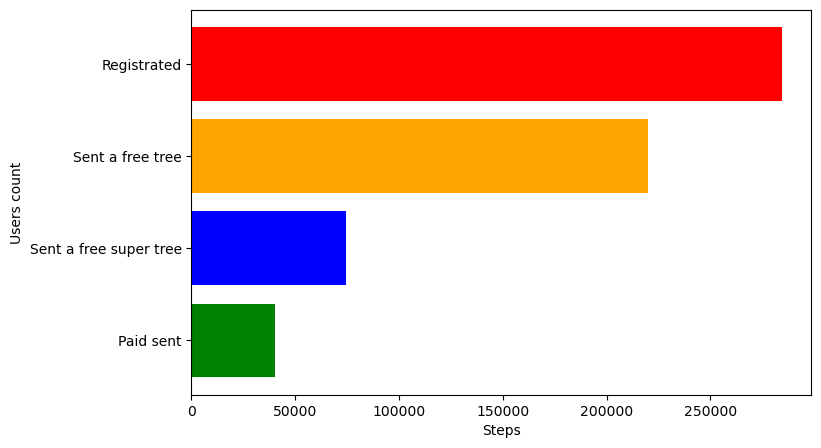

In [105]:
x = ["Registrated", "Sent a free tree", "Sent a free super tree", "Paid sent"]
y = [reg_users, free_sent_users, free_super_users, paid_users]
colors = ["red", "orange", "blue", "green"]

plt.figure(figsize=(8,5))
plt.barh(x, y, color=colors)
plt.xlabel("Steps")
plt.ylabel("Users count")
plt.gca().invert_yaxis()
plt.show()

In [6]:
reg_users = registration.groupby("acquired_from").count()[["user_id"]].reset_index().rename(columns={"user_id":"user_count"})

free_sent_by_users = free_tree.merge(registration, how="inner", on="user_id") 
free_sent_users = free_sent_by_users.groupby("acquired_from").nunique()[["user_id"]].reset_index().rename(columns={"user_id":"user_count"})

free_super_by_users = super_sent_by_user.merge(registration, how="inner", on="user_id")
free_super_users = free_super_by_users.groupby("acquired_from").nunique()[["user_id"]].reset_index().rename(columns={"user_id":"user_count"})

paid_super_by_users = paid_super_sent_users.merge(registration, how="inner", on="user_id")
paid_users = paid_super_by_users.groupby("acquired_from").nunique()[["user_id"]].reset_index().rename(columns={"user_id":"user_count"})

Choose a source (article, google, invite_a_friend, paid) google


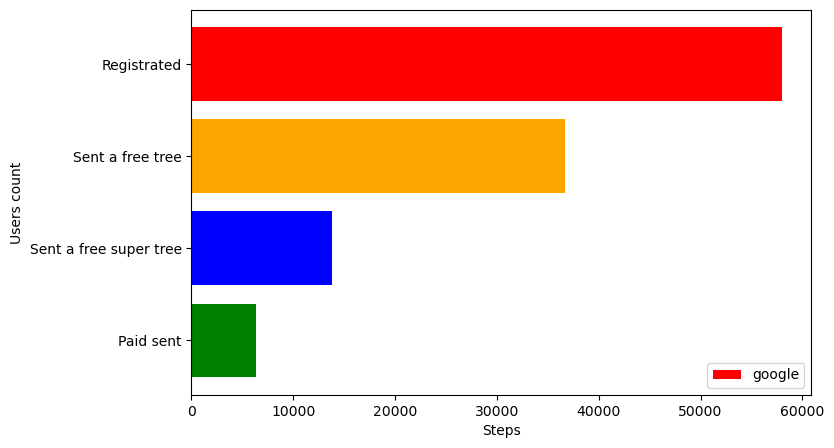

In [7]:
source = input("Choose a source (article, google, invite_a_friend, paid) ").lower()

reg = reg_users[reg_users.acquired_from == source].user_count.item()
free = free_sent_users[free_sent_users.acquired_from == source].user_count.item()
tried = free_super_users[free_super_users.acquired_from == source].user_count.item()
if source == "paid":
    pay = 0
else:
    pay = paid_users[paid_users.acquired_from == source].user_count.item()

x = ["Registrated", "Sent a free tree", "Sent a free super tree", "Paid sent"]
y = [reg, free, tried, pay]
colors = ["red", "orange", "blue", "green"]

plt.figure(figsize=(8,5))
plt.barh(x, y, label=source, color=colors)
plt.xlabel("Steps")
plt.ylabel("Users count")
plt.gca().invert_yaxis()
plt.legend()
plt.show()